In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train_df = pd.read_csv("twitter_training.csv", header=None)
val_df = pd.read_csv("twitter_validation.csv", header=None)

In [4]:
train_df.head(5)

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [5]:
val_df.head(5)

,0,1,2,3
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [6]:
train_df.shape

(74682, 4)

In [7]:
val_df.shape

(1000, 4)

In [8]:
train_df.columns

Int64Index([0, 1, 2, 3], dtype='int64')

In [9]:
val_df.columns

Int64Index([0, 1, 2, 3], dtype='int64')

In [10]:
train_df.columns = ['id', 'platform', 'sentiment', 'text']

In [11]:
val_df.columns = ['id', 'platform', 'sentiment', 'text']

In [12]:
train_df.head(5)

,id,platform,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [13]:
train_df['sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [14]:
train_df['text'] = train_df['text'].fillna('')
val_df['text'] = val_df['text'].fillna('')

In [15]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sanch\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sanch\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
def preprocess_text(text):
    words = nltk.word_tokenize(text.lower())

    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    return ' '.join(words)

In [17]:
train_df['text'] = train_df['text'].apply(preprocess_text)
val_df['text'] = val_df['text'].apply(preprocess_text)

In [18]:
#train_df['text'].dtype

In [19]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_df['text'])
y_train = train_df['sentiment']

X_val = vectorizer.transform(val_df['text'])
y_val = val_df['sentiment']

In [21]:
print(X_train)

  (0, 17174)	0.6543101069851935
  (0, 4444)	0.4079408178302904
  (0, 11128)	0.42336433151291913
  (0, 13116)	0.4756313865248987
  (1, 14632)	0.5014879069139532
  (1, 4440)	0.6911512268515347
  (1, 6073)	0.5204035557533024
  (2, 14632)	0.5397299753645705
  (2, 4444)	0.4541235121475237
  (2, 11128)	0.47129311101351556
  (2, 13116)	0.5294772827222717
  (3, 6073)	0.48550896787679565
  (3, 17174)	0.6313953537874274
  (3, 4444)	0.3936542233545497
  (3, 13116)	0.45897418419992225
  (4, 17174)	0.6543101069851935
  (4, 4444)	0.4079408178302904
  (4, 11128)	0.42336433151291913
  (4, 13116)	0.4756313865248987
  (5, 17174)	0.6543101069851935
  (5, 4444)	0.4079408178302904
  (5, 11128)	0.42336433151291913
  (5, 13116)	0.4756313865248987
  (6, 16801)	0.3137310457020317
  (6, 6043)	0.08973767913904208
  :	:
  (74679, 13007)	0.27093163688760974
  (74679, 28394)	0.19825382497033267
  (74680, 18854)	0.41132182528550987
  (74680, 17961)	0.19622387852775747
  (74680, 8379)	0.2791751290058617
  (74680, 278

In [29]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

In [30]:
clf.fit(X_train, y_train)

MultinomialNB()

In [32]:
y_pred = clf.predict(X_val)

In [34]:
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.811


In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

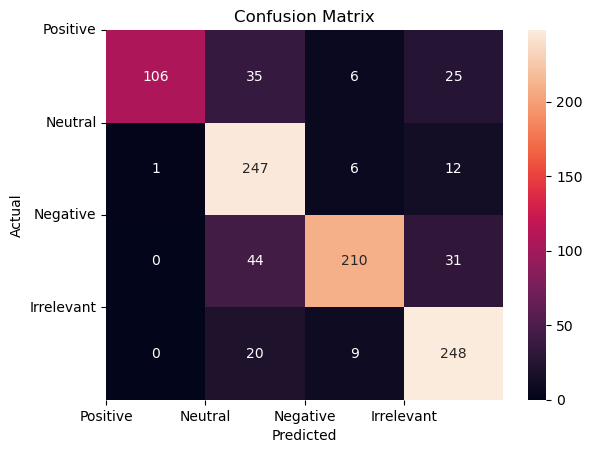

In [42]:
class_labels = ['Positive', 'Neutral', 'Negative', 'Irrelevant']

sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=range(len(class_labels)), labels=class_labels)
plt.yticks(ticks=range(len(class_labels)), labels=class_labels, rotation=0)
plt.show()

In [ ]:
svm_model = SVC()

param_grid = {'C': [0.1, 1, 10], 
              'kernel': ['linear', 'rbf', 'poly'],
              'gamma': [0.1, 1, 10]}

grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

In [ ]:
best_model = grid_search.best_estimator_

svm_y_pred = best_model.predict(X_val)
accuracy = accuracy_score(y_val, svm_y_pred)   

print("Accuracy:", accuracy)
print(classification_report(y_val, svm_y_pred))
print(confusion_matrix(y_val, svm_y_pred))

In [ ]:
class_labels = ['Positive', 'Neutral', 'Negative', 'Irrelevant']

sns.heatmap(confusion_matrix(y_val, svm_y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=range(len(class_labels)), labels=class_labels)
plt.yticks(ticks=range(len(class_labels)), labels=class_labels, rotation=0)
plt.show()